## PyTorch Resnets

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)
pd.set_option('display.max_rows', 50)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [12]:
series = 303
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "resnet-human" # change yolo - resnet-human
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [13]:
results.columns

Index(['experiment_id', 'client_to_model_avg', 'client_to_model_p99',
       'client_to_model_p95', 'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p95', 'model_latencies_p50',
       'model_latencies_var', 'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var', 'model_to_client_max',
       'model_to_client_min', 'e2e_latencies_avg', 'e2e_latencies_p99',
       'e2e_latencies_p95', 'e2e_latencies_p50', 'e2e_latencies_var',
       'e2e_latencies_max', 'e2e_latencies_min', 'start_time', 'end_time',
       'duration', 'timeout_count', 'cpu_usage_count_avg',
       'cpu_usage_count_p99', 'cpu_usage_count_p95', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p

In [14]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 1,
    'central_queue': False,
    'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'image',
    'distrpution_time': 10,
    'from_storage': False,
    'logs_enabled': False,
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['10Gi'],
    'mode': 'exponential',
    'model_variants': ['resnet18'],
    'node_name': 'resnet-human',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'pipeline_name': 'video',
    'repetition': 1,
    'replicas': [1],
    'series': 308,
    'series_meta': 'intra = 1, inter = int(cpu)',
    'timeout': 1,
    'use_threading': 'True',
    'workload_config': {'load_duration': 10, 'loads_to_test': [128]},
    'workload_type': 'static'}


In [15]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,video,resnet-human,resnet18,1,10Gi,1,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
1,2,video,resnet-human,resnet18,2,10Gi,1,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
2,3,video,resnet-human,resnet18,4,10Gi,1,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
3,4,video,resnet-human,resnet18,8,10Gi,1,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
4,5,video,resnet-human,resnet18,16,10Gi,1,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
5,6,video,resnet-human,resnet18,1,10Gi,2,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
6,7,video,resnet-human,resnet18,2,10Gi,2,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
7,8,video,resnet-human,resnet18,4,10Gi,2,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
8,9,video,resnet-human,resnet18,8,10Gi,2,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1
9,10,video,resnet-human,resnet18,16,10Gi,2,1,128,10,308,"intra = 1, inter = int(cpu)",1,False,exponential,image,1


In [16]:
# experiment_ids = key_config_df["experiment_id"].tolist()
    # (key_config_df["model_variant"] == "resnet18") & (key_config_df["cpu_request"] == 2.2)
experiment_ids = key_config_df[(key_config_df["model_variant"] == "resnet18") & (key_config_df["load"] == 128) & (key_config_df["max_batch_size"] <= 16)]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_min",
    "model_latencies_p95",
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "throughput_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)

# output["expected_throughput"] = (
#     1 / output["model_latencies_avg"] * output["max_batch_size"]
# )
# output.sort_values(by='throughput')
display(output)

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,resnet18,1,1,128,0.041700,0.051175,0.059855,22.385226,0.045220,21.305085
1,resnet18,1,2,128,0.024879,0.031707,0.039353,8.712312,0.027711,34.083766
2,resnet18,1,4,128,0.015804,0.020237,0.023771,0.144327,0.017081,54.409091
3,resnet18,1,8,128,0.011320,0.016093,0.017113,NaN,0.012472,73.125000
4,resnet18,1,16,128,0.009310,0.011573,0.014395,112.018981,0.010269,87.461538
5,resnet18,2,1,128,0.074115,0.087994,0.107763,9.899561,0.079811,24.000000
6,resnet18,2,2,128,0.041994,0.051403,0.059659,29.348034,0.045966,40.688908
7,resnet18,2,4,128,0.025383,0.028851,0.034830,0.141016,0.027063,65.877053
8,resnet18,2,8,128,0.017267,0.019735,0.023189,NaN,0.018302,95.833333
9,resnet18,2,16,128,0.013493,0.015952,0.018723,NaN,0.014555,109.779636


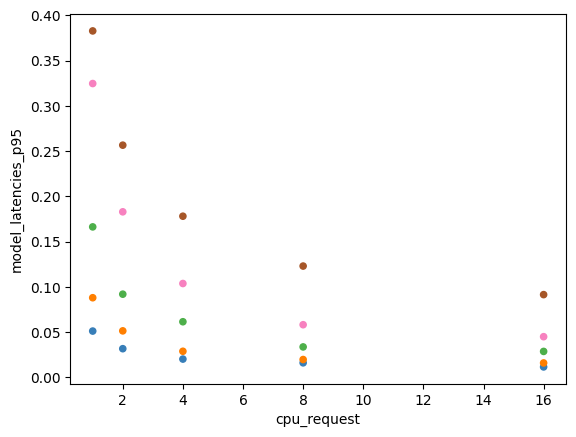

In [17]:
color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

ax = output.plot.scatter(
    x="cpu_request", y="model_latencies_p95", c=output['max_batch_size'].map({1:color[0], 2:color[1], 4:color[2], 8:color[3], 16:color[4], 32:color[5]}), style="o-"
)


In [18]:
display(output[output['cpu_request']==8])


,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
3,resnet18,1,8,128,0.011320,0.016093,0.017113,NaN,0.012472,73.125000
8,resnet18,2,8,128,0.017267,0.019735,0.023189,NaN,0.018302,95.833333
13,resnet18,4,8,128,0.028283,0.033661,0.037872,0.158994,0.030727,112.800000
18,resnet18,8,8,128,0.052075,0.058188,0.060909,0.160669,0.054352,123.611200
23,resnet18,16,8,128,0.040284,0.122973,0.144356,0.154679,0.101464,114.700000


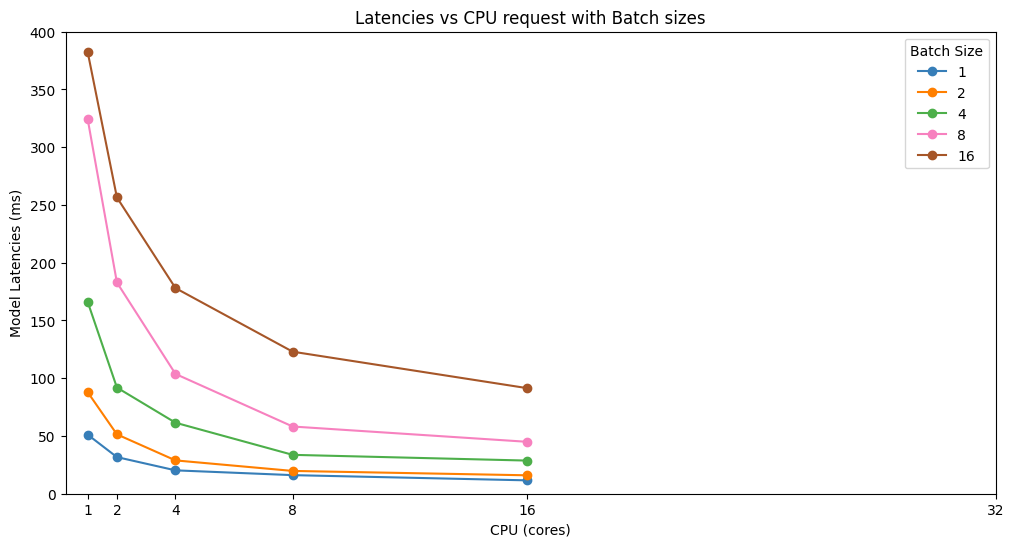

In [19]:
helper = output.copy()
helper['model_latencies_p95'] *= 1000
pivot_df = helper.pivot(index='cpu_request', columns='max_batch_size', values='model_latencies_p95')
ax = pivot_df.plot(marker='o', linestyle='-', figsize=(12, 6), color=color[0:5])
plt.legend([f'{size}' for size in pivot_df.columns], title='Batch Size')

plt.ylim([0, 400])
plt.xticks([1, 2, 4, 8, 16, 32])
plt.xlabel('CPU (cores)')
plt.ylabel('Model Latencies (ms)')  # Adjust ylabel accordingly
plt.title('Latencies vs CPU request with Batch sizes')
plt.savefig('latency_vs_cpu_with_batch.pdf')